In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from   matplotlib    import rc

fsize = 25
rc('text', usetex=False)
rc('font', size=fsize)#, ftype=42)
line_width = 2.9


In [2]:
data_5 = {'nproc': np.array([32,64,128,256]), 'time' : np.array([314.77,138.38,120.57,86.09])}
data_6 = {'nproc': np.array([32,64,128,256,512]), 'time': np.array([1776.74,915.73,533.88,392.79,329.89])}

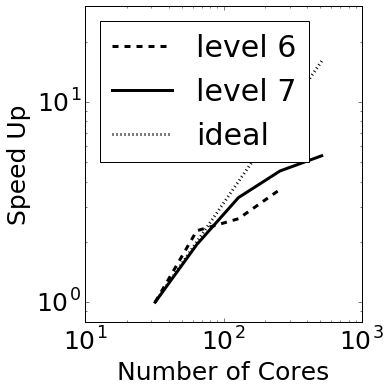

In [3]:
fig, ax = plt.subplots()


xvals = np.arange(1,np.size(data_5['nproc'])+1,1)
xvals = data_5['nproc']
ax.plot(xvals, data_5['time'][0]/data_5['time'], label = 'level 6', 
                           color = 'black', ls = '--', lw = 3)
xvals = np.arange(1,np.size(data_6['nproc'])+1,1)
xvals = data_6['nproc']
ax.plot(xvals, data_6['time'][0]/data_6['time'], label = 'level 7',
                         color = 'black', ls = '-', lw = 3)

xticks = ['32','64','128','256','512']

ax.set_xlabel('Number of Cores')
ax.set_ylabel('Speed Up')
#ax.set_xticks([1,2,3,4,5])
#ax.set_xticklabels(xticks)
ax.plot(xvals,[1,2,4,8,16], label = 'ideal', lw = 3, color = 'black', ls = ':')

ax.legend(loc='upper left')

ax.semilogy()
ax.semilogx()
ax.set_ylim(0.8,30.0)
fig.set_size_inches(6,6)
plt.tight_layout()
fig.savefig('scaling.png')

In [4]:
#
# code performance on each level
#
#
data_6 = {'level': np.array([0,1,2,3,4,5,6]), 
          'time' : np.array([0.9791011,0.5758282,0.8644644,2.604374,1.197048E1,2.17622E1,6.0370933E1]),
          'efficiency' : np.array([1.673372E4, 3.193661E3, 6.659615E3, 1.818326E4, 2.015589E4, 1.240907E4, 1.704220E4]),
          'cells': np.array([2097152,118976,358384,1128880,1897024,1164832,2956704])}
          
data_7 = {'level': np.array([0,1,2,3,4,5,6,7]), 
          'time': np.array([2.57235,5.382272E-1,8.86937E-1,2.488162,10.40780,22.70077,65.12312,241.6565]),
          'efficiency' : np.array([2.403563e+04, 3.803096e+03, 6.686251e+03,  1.849891e+04,2.183497e+04,1.282786e+04,1.795146e+04,2.747025e+04]),
          'cells' : np.array([2097152,117696,368640,1209120,1800312,891704,1816480,7376248])}
          

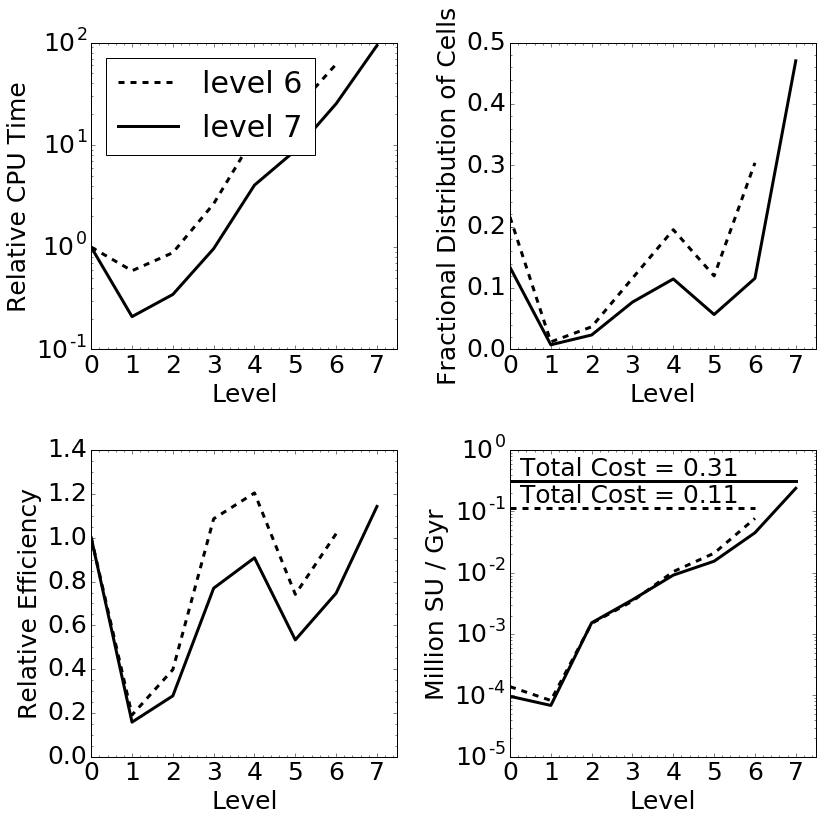

In [5]:
fig, ax = plt.subplots(2,2)

ax[(0,0)].plot(data_6['level'], data_6['time']/data_6['time'][0], lw = 3, color = 'black', ls = '--', label = 'level 6')
ax[(0,0)].plot(data_7['level'], data_7['time']/data_7['time'][0], lw = 3, color = 'black', ls = '-', label = 'level 7')
ax[(0,0)].legend(loc='upper left')
ax[(1,0)].plot(data_6['level'], data_6['efficiency']/data_6['efficiency'][0], lw = 3, color = 'black', ls = '--', label = '2 pc')
ax[(1,0)].plot(data_7['level'], data_7['efficiency']/data_7['efficiency'][0], lw = 3, color = 'black', ls = '-', label = '1 pc')


ax[(0,0)].set_xlabel('Level')
ax[(0,0)].set_ylabel('Relative CPU Time')
ax[(0,0)].semilogy()

ax[(1,0)].set_xlabel('Level')
ax[(1,0)].set_ylabel('Relative Efficiency')

ax[(0,1)].plot(data_6['level'], data_6['cells']/(1.0*np.sum(data_6['cells'])), lw = 3, color = 'black', ls = '--', label = '2 pc')
ax[(0,1)].plot(data_7['level'], data_7['cells']/(1.0*np.sum(data_7['cells'])), lw = 3, color = 'black', ls = '-', label = '1 pc')

ax[(0,1)].set_xlabel('Level')
ax[(0,1)].set_ylabel('Fractional Distribution of Cells')

dt_each_level = np.array([0.25, 0.125, 0.01, 0.005, 0.0025, 0.00125, 0.000625, 0.0003125])

nproc = 128
fudge = 1
data_6['su_per_myr'] = data_6['cells'] / (data_6['efficiency']*nproc) / dt_each_level[:-1] / 3600.0 * nproc * fudge
data_7['su_per_myr'] = data_7['cells'] / (data_7['efficiency']*nproc) / dt_each_level / 3600.0 * nproc * fudge

ax[(1,1)].plot(data_6['level'], data_6['su_per_myr']/1.0E3, lw = 3, color = 'black', ls = '--', label = '2 pc')
ax[(1,1)].plot(data_7['level'], data_7['su_per_myr']/1.0E3, lw = 3, color = 'black',  ls = '-', label = '1 pc')

cost_6 = np.sum(data_6['su_per_myr'])/1.0E3
ax[(1,1)].plot([0,6],[cost_6]*2 , lw = 3, color = 'black', ls = '--')
cost_7 = np.sum(data_7['su_per_myr'])/1.0E3
ax[(1,1)].plot([0,7],[cost_7]*2, lw = 3, color = 'black', ls = '-')


ax[(1,1)].set_xlabel('Level')
ax[(1,1)].set_ylabel('Million SU / Gyr')

xcoord = 0.25
ax[(1,1)].annotate('Total Cost = %.2f'%(cost_6),
                   xy=(xcoord,1.2*cost_6), xytext=(xcoord,1.2*cost_6),
                   textcoords='data')
ax[(1,1)].annotate('Total Cost = %.2f'%(cost_7),
                   xy=(xcoord,cost_7*1.2), xytext=(xcoord,1.2*cost_7),
                   textcoords='data')
ax[(1,1)].semilogy()
for a in [(0,0),(0,1),(1,0),(1,1)]:
    ax[a].minorticks_on()
    ax[a].set_xlim(0,7.5)

fig.set_size_inches(12,12)
plt.tight_layout()
fig.savefig('levels.png')

In [6]:
data_4 = {'sources': np.array([0,3,16,24,52,71,85,106,130,151,172]),
          'update_rate'   : np.array([7.59E5,7.18E5,5.05E5,3.61E5,3.08E5,1.59E5,1.89E5,2.12E5,1.54E5,1.43E5,1.27E5])}

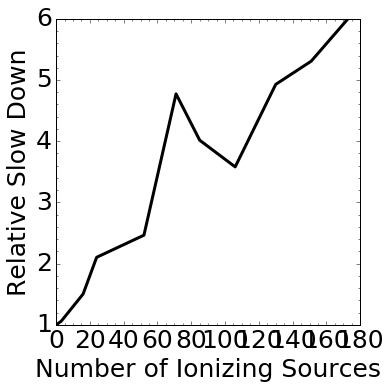

In [7]:
fig, ax = plt.subplots()

ax.plot(data_4['sources'], (data_4['update_rate'][0] / (1.0 * data_4['update_rate'])),
        lw = 3, color = 'black', ls = '-')
ax.set_xlabel('Number of Ionizing Sources')
ax.set_ylabel('Relative Slow Down')
ax.minorticks_on()

fig.set_size_inches(6,6)
plt.tight_layout()
fig.savefig('radiation.png')

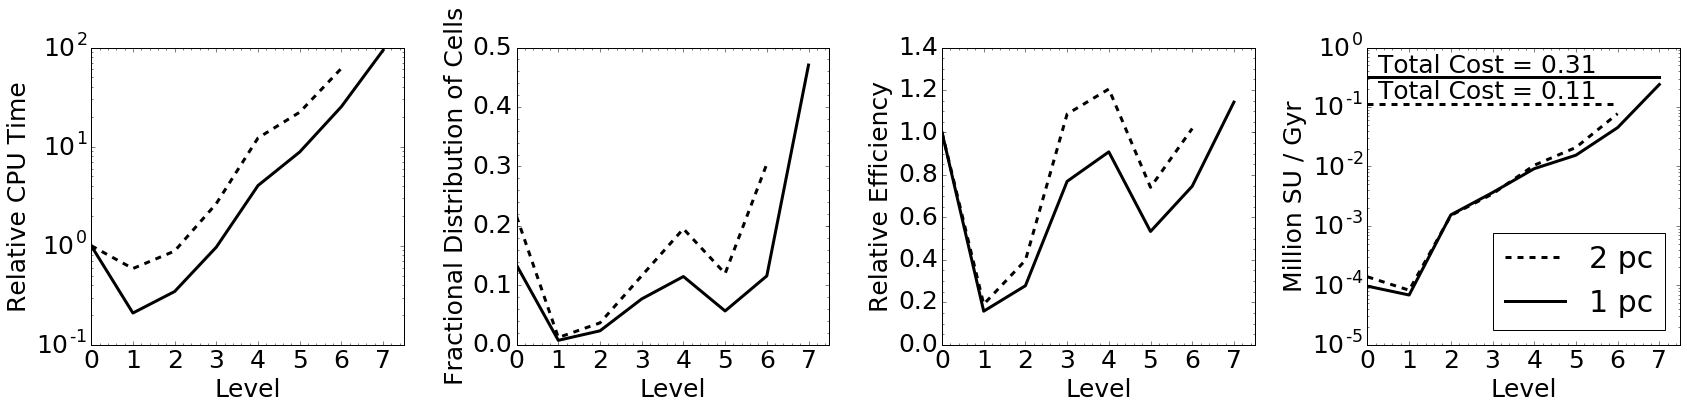

In [12]:
fig, ax = plt.subplots(1,4)

ax[0].plot(data_6['level'], data_6['time']/data_6['time'][0], lw = 3, color = 'black', ls = '--', label = 'level 6')
ax[0].plot(data_7['level'], data_7['time']/data_7['time'][0], lw = 3, color = 'black', ls = '-', label = 'level 7')
ax[2].plot(data_6['level'], data_6['efficiency']/data_6['efficiency'][0], lw = 3, color = 'black', ls = '--', label = '2 pc')
ax[2].plot(data_7['level'], data_7['efficiency']/data_7['efficiency'][0], lw = 3, color = 'black', ls = '-', label = '1 pc')


ax[0].set_xlabel('Level')
ax[0].set_ylabel('Relative CPU Time')
ax[0].semilogy()

ax[2].set_xlabel('Level')
ax[2].set_ylabel('Relative Efficiency')

ax[1].plot(data_6['level'], data_6['cells']/(1.0*np.sum(data_6['cells'])), lw = 3, color = 'black', ls = '--', label = '2 pc')
ax[1].plot(data_7['level'], data_7['cells']/(1.0*np.sum(data_7['cells'])), lw = 3, color = 'black', ls = '-', label = '1 pc')

ax[1].set_xlabel('Level')
ax[1].set_ylabel('Fractional Distribution of Cells')

dt_each_level = np.array([0.25, 0.125, 0.01, 0.005, 0.0025, 0.00125, 0.000625, 0.0003125])

nproc = 128
fudge = 1
data_6['su_per_myr'] = data_6['cells'] / (data_6['efficiency']*nproc) / dt_each_level[:-1] / 3600.0 * nproc * fudge
data_7['su_per_myr'] = data_7['cells'] / (data_7['efficiency']*nproc) / dt_each_level / 3600.0 * nproc * fudge

ax[3].plot(data_6['level'], data_6['su_per_myr']/1.0E3, lw = 3, color = 'black', ls = '--', label = '2 pc')
ax[3].plot(data_7['level'], data_7['su_per_myr']/1.0E3, lw = 3, color = 'black',  ls = '-', label = '1 pc')

cost_6 = np.sum(data_6['su_per_myr'])/1.0E3
ax[3].plot([0,6],[cost_6]*2 , lw = 3, color = 'black', ls = '--')
cost_7 = np.sum(data_7['su_per_myr'])/1.0E3
ax[3].plot([0,7],[cost_7]*2, lw = 3, color = 'black', ls = '-')


ax[3].set_xlabel('Level')
ax[3].set_ylabel('Million SU / Gyr')

xcoord = 0.25
ax[3].annotate('Total Cost = %.2f'%(cost_6),
                   xy=(xcoord,1.2*cost_6), xytext=(xcoord,1.2*cost_6),
                   textcoords='data')
ax[3].annotate('Total Cost = %.2f'%(cost_7),
                   xy=(xcoord,cost_7*1.2), xytext=(xcoord,1.2*cost_7),
                   textcoords='data')
ax[3].semilogy()
for a in [0,1,2,3]:
    ax[a].minorticks_on()
    ax[a].set_xlim(0,7.5)
ax[3].legend(loc='lower right')

fig.set_size_inches(24,6)
plt.tight_layout()
fig.savefig('levels_row.png')